# wyniki testów

In [2]:
from some_functions import *
from popularity_model import *
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
results = get_db(r'C:\Users\a814811\OneDrive - Atos\RecommenderSystem\Piotr\model\test_model\test_results')

In [6]:
results.head()

,model,user,number_of_recomm,user_articles,precision,recall,model_ev
0,popularity,0,1,0,NaN,NaN,1.0
1,popularity,0,2,0,NaN,NaN,1.0
2,popularity,0,3,0,NaN,NaN,1.0
3,popularity,0,4,0,NaN,NaN,1.0
4,popularity,0,5,0,NaN,NaN,1.0


In [104]:
results[results['user_articles']<1][['model','user','user_articles']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 33148
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   model          60 non-null     object
 1   user           60 non-null     int64 
 2   user_articles  60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


### precision and recalls for models, from every possible number of recommendations

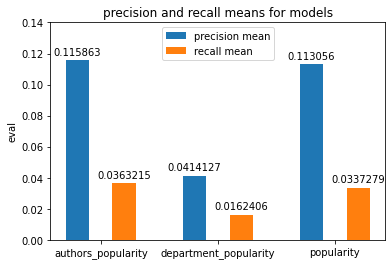

In [57]:
pre = results.groupby(['model'])['precision'].mean()
rec = results.groupby(['model'])['recall'].mean()


wd = 0.2
x = np.arange(3)

fig, ax = plt.subplots()
a1 = ax.bar(x-wd, pre.values, wd, label='precision mean')
a2 = ax.bar(x+wd, rec.values, wd, label='recall mean')
ax.set_ylabel('eval')
ax.set_xticks(x)
ax.set_xticklabels(pre.index)
# limit dla osi y
plt.gca().set_ylim([0,0.14])

ax.bar_label(a1,padding=3)
ax.bar_label(a2,padding=3)
ax.legend(loc='upper center')
plt.title('precision and recall means for models')
plt.show()

#### % of users without recommendation for model

In [95]:
# a = results.groupby(['model','user']).agg({'number_of_recomm': 'max'})
# # a.count() # 1001
# a = a[a['number_of_recomm']==0] 
# a.groupby(['model']).agg({'number_of_recomm': 'count'})
# # odejmuje 1, bo to uzytkownik testowy bez niczego (powinno być NaN w tabeli)

# alternatywnie
a = results.groupby(['model','user']).agg({'precision': 'max'})
a[a['precision'].isna()].reset_index().groupby(['model']).count()['user']

model
authors_popularity       349
department_popularity      7
popularity                 1
Name: user, dtype: int64

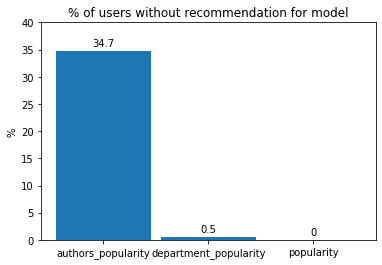

In [60]:
x = np.arange(3)
wd=0.9
fig, ax = plt.subplots()
a1 = ax.bar(x, [34.7,0.5,0], wd)
ax.set_xticks(x)
ax.set_xticklabels(pre.index)
ax.set_ylabel('%')
ax.bar_label(a1,padding=3)
plt.gca().set_ylim([0,40])
plt.title('% of users without any model recommendation')
plt.show()

In [153]:
m5 = results[results['number_of_recomm']==5]
m10 = results[results['number_of_recomm']==10]
m15 = results[results['number_of_recomm']==15]

m5.groupby(['model'])['precision','recall'].describe().reset_index()

<ipython-input-153-551b786be0a6>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = m5.groupby(['model'])['precision','recall'].describe().reset_index()


model precision                                          \
                             count      mean       std  min  25%  50%  75%   
0     authors_popularity     649.0  0.135285  0.168517  0.0  0.0  0.0  0.2   
1  department_popularity     993.0  0.041893  0.092986  0.0  0.0  0.0  0.0   
2             popularity    1000.0  0.146000  0.169684  0.0  0.0  0.2  0.2   

        recall                                                              
   max   count      mean       std  min  25%       50%       75%       max  
0  0.8   649.0  0.022668  0.032056  0.0  0.0  0.000000  0.040000  0.250000  
1  0.4   993.0  0.007999  0.021767  0.0  0.0  0.000000  0.000000  0.166667  
2  0.8  1000.0  0.026706  0.037054  0.0  0.0  0.020833  0.042553  0.333333

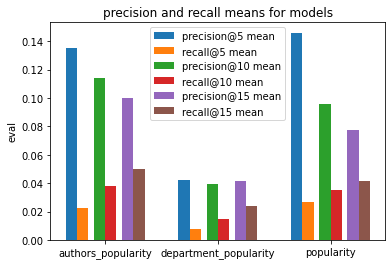

In [141]:

def mn(db,name):
    return db.groupby(['model'])[name].mean()


wd = 0.1
x = np.arange(3)

fig, ax = plt.subplots()
a1 = ax.bar(x-3*wd, mn(m5,'precision').values, wd, label='precision@5 mean')
a2 = ax.bar(x-2*wd, mn(m5,'recall').values, wd, label='recall@5 mean')
a3 = ax.bar(x-wd/2, mn(m10,'precision').values, wd, label='precision@10 mean')
b1 = ax.bar(x+1*wd/2, mn(m10,'recall').values, wd, label='recall@10 mean')
b2 = ax.bar(x+2*wd, mn(m15,'precision').values, wd, label='precision@15 mean')
b3 = ax.bar(x+3*wd, mn(m15,'recall').values, wd, label='recall@15 mean')

ax.set_ylabel('eval')
ax.set_xticks(x)
ax.set_xticklabels(mn(m5,'precision').index)

ax.legend(loc='upper center')
plt.title('precision and recall means for models')
plt.show()